In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
dataset = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")
dataset = dataset.drop('patient_id', axis=1)

In [40]:
dataset.describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


In [41]:
dataset.head()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [42]:
len(np.unique(dataset['drug_approved_by_UIC']))

3537

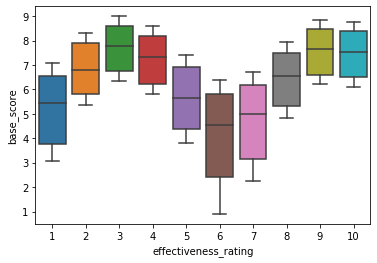

In [43]:
sns.boxplot(x=dataset['effectiveness_rating'], y=dataset['base_score'])

In [44]:
dataset['drug_approved_by_UIC'] = pd.to_datetime(dataset['drug_approved_by_UIC'])

In [170]:
X = dataset.iloc[:, [4,6]]
y = dataset.iloc[:, -1]
test_data = test.iloc[:, [4,6]]

In [171]:
regressor = RandomForestRegressor()
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

In [173]:
def createRegressors():
    regressors.append(('DecisionTree', DecisionTreeRegressor()))
    regressors.append(('RandomForest', RandomForestRegressor()))
    regressors.append(('SVR', SVR()))

In [174]:
def trainRegressors(X, y):
    for regressor in regressors:
        regressor[1].fit(X, y)

In [175]:
def predictRegressors(X):
    for regressor in regressors:
        predictions.append((regressor[0], regressor[1].predict(X)))

In [176]:
def getPerformance(actual):
    for prediction in predictions:
        print("------------------"+prediction[0]+"------------------")
        print('Root Mean squared error: %.2f'% sqrt(mean_squared_error(actual, prediction[1])))
        print('Coefficient of determination: %.2f'% r2_score(actual, prediction[1]))

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
regressors = list()
predictions = list()
createRegressors()
trainRegressors(X, y)

In [178]:
from math import sqrt
predictRegressors(X_test)
getPerformance(y_test)

------------------DecisionTree------------------
Root Mean squared error: 0.17
Coefficient of determination: 0.99
------------------RandomForest------------------
Root Mean squared error: 0.15
Coefficient of determination: 0.99
------------------SVR------------------
Root Mean squared error: 1.47
Coefficient of determination: 0.14


In [186]:
y_pred = regressors[1][1].predict(test_data)

In [191]:
y_pred
test['patient_id'].values

array([163740,  39293, 208087, ..., 159999, 130945, 113712])

In [192]:
test_ = np.column_stack((test['patient_id'].values, y_pred))

In [193]:
test_

array([[1.63740000e+05, 8.57448588e+00],
       [3.92930000e+04, 8.65679674e+00],
       [2.08087000e+05, 8.35895072e+00],
       ...,
       [1.59999000e+05, 8.57448588e+00],
       [1.30945000e+05, 5.28175623e+00],
       [1.13712000e+05, 8.65679674e+00]])

In [199]:
df = pd.DataFrame({'patient_id': test['patient_id'].values, 'base_score': y_pred})

In [201]:
df.head()

,patient_id,base_score
0,163740,8.574486
1,39293,8.656797
2,208087,8.358951
3,23295,6.493653
4,97013,8.074493


In [202]:
df.to_csv("dataset/result.csv", index=False)